                        PROYECTO FINAL ANALISIS DE DATOS INTOXICACIONES EN NORTE DE SANTANDER 2014-2022

Presentado por.

Fernando Rodriguez


Entidad que suministró los datos: Alcaldía de Bucaramanga.

Elaborado por: Centro de Analítica de Datos

Fuente de los datos: Secretaría de Salud y Ambiente - Departamento de Santander

Descripción del conjunto de datos:

Filas: 1.635
Columnas: 99
Tipo de datos de columnas: Texto (98), Número (1)

Descripción de los datos:

Se presentan los casos de intoxicaciones por tipo de sustancias (Medicamentos, Sustancias Psicoactivas, Plaguicidas, Sustancias químicas, Alcohol) según la intencionalidad, comunas, sexo, curso de vida, lugar de ocurrencia y nombre del producto.

Pasos realizados:

Exploración visual: Se realizó una exploración inicial para identificar y entender los datos en la fuente.

Descarga del archivo: Se descargó el archivo en formato CSV para su análisis en Excel.

Enlace a la fuente de datos

Documentación de hallazgos relevantes en el Database:

Al explorar las primeras 16 columnas, se identificó un desplazamiento en la columna 3 con un dato de tipo texto denominado "grupo", que estaba precedido por una secuencia numérica (1001, 1002, ..., 1635). Esta secuencia desplazaba un gran número de columnas y no estaba relacionada con la descripción de database. 


Para corregir la distorsión, se suprimió esta anomalía y se ajustaron las filas 1001 a 1635, moviéndolas a la izquierda.

In [618]:
import matplotlib.pyplot as pd
import pandas as pd

Se importan las bibliotecas matplotlib.pyplot y pandas para la creación de gráficos y el análisis de datos, respectivamente.

In [619]:
intoxicaciones_df = pd.read_csv("data/intoxicaciones.csv",delimiter=';')

Esta línea de código utiliza la biblioteca pandas para leer un archivo CSV llamado intoxicaciones.csv que se encuentra en el directorio data. El archivo CSV está delimitado por punto y coma (;), lo cual se especifica mediante el parámetro delimiter. El contenido del archivo se carga en un DataFrame llamado intoxicaciones_df.

La instrucción carga datos desde un archivo CSV delimitado por punto y coma en un DataFrame para su posterior análisis.

In [620]:
intoxicaciones_df

,num casos,fecha notificacion,semana epidemiológica,año epidemiológica,cod_sub,edad,uni_med_,unid_edad,grupo etario,clasif_edad,...,sit_ale,muest_toxi,tipo_muest,prueba,result_pru,hor_inv_br,nom_eve,unidad primaria generadora dato,departamento procedencia,nreg
0,3,18/12/2014,51,2014,1,33,1,133,29 a 39,29 a 59,...,2.0,2.0,NaN,NaN,NaN,NaN,INTOXICACIONES,CLINICA CHICAMOCHA SA,SANTANDER,1
1,1,21/12/2014,50,2014,1,57,1,157,50 a 59,29 a 59,...,2.0,2.0,NaN,NaN,NaN,NaN,INTOXICACIONES,HOSPITAL UNIVERSITARIO DE SANTANDER,SANTANDER,2
2,9,21/12/2014,51,2014,1,1,1,11,0 a 6,0 a 6,...,1.0,2.0,NaN,NaN,NaN,NaN,INTOXICACIONES,HOSPITAL UNIVERSITARIO DE SANTANDER,SANTANDER,3
3,4,23/12/2014,52,2014,1,2,1,12,0 a 6,0 a 6,...,2.0,2.0,NaN,NaN,NaN,NaN,INTOXICACIONES,CLINICA MATERNO INFANTIL SAN LUIS SA,SANTANDER,4
4,8,23/12/2014,52,2014,1,18,1,118,18 a 28,18 a 28,...,2.0,2.0,NaN,NaN,NaN,NaN,INTOXICACIONES,HOSPITAL UNIVERSITARIO DE SANTANDER,SANTANDER,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1630,1632,10/10/2022,40,2022,1,32,1,132,29 a 39,29 a 39,...,2.0,2.0,NaN,NaN,NaN,NaN,INTOXICACIONES,ASISTENCIA MEDICA SAS SERVICIO DE AMBULANCIA P...,SANTANDER,NaN
1631,1633,10/10/2022,41,2022,2,7,2,27,7 a 11,7 a 11,...,2.0,2.0,NaN,NaN,NaN,NaN,INTOXICACIONES,UIMIST,SANTANDER,NaN
1632,1565,15/10/2022,34,2022,1,29,1,129,29 a 39,29 a 39,...,2.0,2.0,NaN,NaN,NaN,NaN,INTOXICACIONES,HOSPITAL UNIVERSITARIO DE SANTANDER,SANTANDER,NaN
1633,1634,15/10/2022,41,2022,1,2,1,12,0 a 6,0 a 6,...,2.0,2.0,NaN,NaN,NaN,NaN,INTOXICACIONES,HOSPITAL UNIVERSITARIO DE SANTANDER,SANTANDER,NaN


intoxicaciones_df: Es una variable que almacena datos en formato de DataFrame para su análisis y procesamiento

In [621]:
type(intoxicaciones_df)

pandas.core.frame.DataFrame

La instrucción type(intoxicaciones_df) se usa para verificar que la variable intoxicaciones_df es un DataFrame de pandas, confirmando el tipo de objeto que se está manejando para asegurar su adecuado uso en el análisis de datos.

In [622]:
intoxicaciones_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1635 entries, 0 to 1634
Data columns (total 78 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   num casos                        1635 non-null   int64  
 1   fecha notificacion               1635 non-null   object 
 2   semana epidemiológica            1635 non-null   int64  
 3   año epidemiológica               1635 non-null   int64  
 4   cod_sub                          1635 non-null   int64  
 5   edad                             1635 non-null   int64  
 6   uni_med_                         1635 non-null   int64  
 7   unid_edad                        1635 non-null   int64  
 8   grupo etario                     1635 non-null   object 
 9   clasif_edad                      1624 non-null   object 
 10  CURSO DE VIDA                    1635 non-null   object 
 11  SEXO                             1635 non-null   object 
 12  localidad_          

La instrucción intoxicaciones_df.info() proporciona un resumen informativo del DataFrame intoxicaciones_df. Esta función muestra:

Número total de entradas (filas) en el DataFrame.
Número de columnas y sus nombres.
Tipo de datos de cada columna (por ejemplo, enteros, flotantes, cadenas de texto).
Número de valores no nulos en cada columna, ayudando a identificar posibles valores faltantes.

In [623]:
intoxicaciones_df.dtypes

num casos                            int64
fecha notificacion                  object
semana epidemiológica                int64
año epidemiológica                   int64
cod_sub                              int64
                                    ...   
hor_inv_br                         float64
nom_eve                             object
unidad primaria generadora dato     object
departamento procedencia            object
nreg                                object
Length: 78, dtype: object

La instrucción intoxicaciones_df.dtypes muestra los tipos de datos de cada columna en el DataFrame intoxicaciones_df.

In [624]:
intoxicaciones_df.columns

Index(['num casos', 'fecha notificacion', 'semana epidemiológica',
       'año epidemiológica', 'cod_sub', 'edad', 'uni_med_', 'unid_edad',
       'grupo etario', 'clasif_edad', 'CURSO DE VIDA', 'SEXO', 'localidad_',
       'bar_ver_', 'barrio', 'COMUNA', 'nom_comuna', 'numnombcomuna',
       'ocupacion_', 'TIPO DE SEGURIDAD SOCIAL', 'cod_ase_', 'aseguradora',
       'per_etn_', 'grupo discapacidad', 'grupo desplazados',
       'grupo migrantes', 'grupo carcelario', 'grupo gestante',
       'grupo indigente', 'grupo madres comunitarias', 'grupo poblacion icbf',
       'grupo desmovizados', 'grupo psiquiatrico', 'grupo victima violencia',
       'grupo otros', 'cod_dpto_r', 'cod_mun_r', 'fec_con_', 'ini_sin_',
       'tip_cas_', 'pac_hos_', 'fec_hos_', 'con_fin_', 'fec_def_', 'ajuste_',
       'fecha_nto_', 'cer_def_', 'cbmte_', 'nuni_modif', 'fec_arc_xl',
       'fec_aju_', 'GRUPO DE SUSTANCIA', 'cod_sust', 'clasificacion',
       'categoria', 'NOMBRE DEL PRODUCTO', 'TIPO DE EXPOSICION

La instrucción intoxicaciones_df.columns devuelve una lista con los nombres de las columnas en el DataFrame intoxicaciones_df.

In [625]:
intoxicaciones_df.head

<bound method NDFrame.head of       num casos fecha notificacion  semana epidemiológica  año epidemiológica  \
0             3         18/12/2014                     51                2014   
1             1         21/12/2014                     50                2014   
2             9         21/12/2014                     51                2014   
3             4         23/12/2014                     52                2014   
4             8         23/12/2014                     52                2014   
...         ...                ...                    ...                 ...   
1630       1632         10/10/2022                     40                2022   
1631       1633         10/10/2022                     41                2022   
1632       1565         15/10/2022                     34                2022   
1633       1634         15/10/2022                     41                2022   
1634       1635         15/10/2022                     41                2022  

La instrucción intoxicaciones_df.head() muestra las primeras cinco filas del DataFrame intoxicaciones_df.

In [626]:
intoxicaciones_df.tail

<bound method NDFrame.tail of       num casos fecha notificacion  semana epidemiológica  año epidemiológica  \
0             3         18/12/2014                     51                2014   
1             1         21/12/2014                     50                2014   
2             9         21/12/2014                     51                2014   
3             4         23/12/2014                     52                2014   
4             8         23/12/2014                     52                2014   
...         ...                ...                    ...                 ...   
1630       1632         10/10/2022                     40                2022   
1631       1633         10/10/2022                     41                2022   
1632       1565         15/10/2022                     34                2022   
1633       1634         15/10/2022                     41                2022   
1634       1635         15/10/2022                     41                2022  

La instrucción intoxicaciones_df.tail() muestra las últimas cinco filas del DataFrame intoxicaciones_df.

In [627]:
intoxicaciones_df.iloc[1:10,0:5]

,num casos,fecha notificacion,semana epidemiológica,año epidemiológica,cod_sub
1,1,21/12/2014,50,2014,1
2,9,21/12/2014,51,2014,1
3,4,23/12/2014,52,2014,1
4,8,23/12/2014,52,2014,1
5,6,24/12/2014,52,2014,1
6,5,25/12/2014,52,2014,1
7,2,26/12/2014,52,2014,1
8,101,08/01/2015,1,2015,1
9,7,11/01/2015,52,2014,1


La instrucción intoxicaciones_df.iloc[1:10, 0:5] extrae las filas desde la segunda hasta la décima (índices 1 a 9) y las primeras cinco columnas (índices 0 a 4) del DataFrame. Esto proporciona una vista detallada de una porción específica de los datos, permitiendo inspeccionar un rango de registros y columnas para un análisis más enfocado.

In [628]:
pd.unique(intoxicaciones_df["nom_eve"])

array(['INTOXICACIONES', nan], dtype=object)

La instrucción pd.unique(intoxicaciones_df["nom_eve"]) devuelve los valores únicos presentes en la columna "nom_eve" del DataFrame intoxicaciones_df.

In [629]:
intoxicaciones_df.tail()

,num casos,fecha notificacion,semana epidemiológica,año epidemiológica,cod_sub,edad,uni_med_,unid_edad,grupo etario,clasif_edad,...,sit_ale,muest_toxi,tipo_muest,prueba,result_pru,hor_inv_br,nom_eve,unidad primaria generadora dato,departamento procedencia,nreg
1630,1632,10/10/2022,40,2022,1,32,1,132,29 a 39,29 a 39,...,2.0,2.0,NaN,NaN,NaN,NaN,INTOXICACIONES,ASISTENCIA MEDICA SAS SERVICIO DE AMBULANCIA P...,SANTANDER,NaN
1631,1633,10/10/2022,41,2022,2,7,2,27,7 a 11,7 a 11,...,2.0,2.0,NaN,NaN,NaN,NaN,INTOXICACIONES,UIMIST,SANTANDER,NaN
1632,1565,15/10/2022,34,2022,1,29,1,129,29 a 39,29 a 39,...,2.0,2.0,NaN,NaN,NaN,NaN,INTOXICACIONES,HOSPITAL UNIVERSITARIO DE SANTANDER,SANTANDER,NaN
1633,1634,15/10/2022,41,2022,1,2,1,12,0 a 6,0 a 6,...,2.0,2.0,NaN,NaN,NaN,NaN,INTOXICACIONES,HOSPITAL UNIVERSITARIO DE SANTANDER,SANTANDER,NaN
1634,1635,15/10/2022,41,2022,1,3,1,13,0 a 6,0 a 6,...,NaN,2.0,2.0,NaN,NaN,NaN,NaN,INTOXICACIONES,HOSPITAL UNIVERSITARIO DE SANTANDER,BUCARAMANGA


Esta instrucción ofrece una vista de los últimos registros del DataFrame, proporcionando una muestra de los datos más recientes. Esto ayuda a verificar la estructura y el contenido de las filas finales del conjunto de datos, permitiendo asegurarse de que los datos están completos y correctamente formateados hasta el final del archivo.

In [630]:
intoxicaciones_df.iloc[1:10,0:5]

,num casos,fecha notificacion,semana epidemiológica,año epidemiológica,cod_sub
1,1,21/12/2014,50,2014,1
2,9,21/12/2014,51,2014,1
3,4,23/12/2014,52,2014,1
4,8,23/12/2014,52,2014,1
5,6,24/12/2014,52,2014,1
6,5,25/12/2014,52,2014,1
7,2,26/12/2014,52,2014,1
8,101,08/01/2015,1,2015,1
9,7,11/01/2015,52,2014,1


intoxicaciones_df.iloc[1:10, 0:5] extrae y muestra los datos de las filas 2 a 10 (índices 1 a 9) y las primeras cinco columnas (índices 0 a 4) del DataFrame. Esto proporciona una vista detallada de un segmento del conjunto de datos, permitiendo revisar una 

In [631]:
intoxicaciones_df["grupo etario"].describe()

count        1635
unique          8
top       18 a 28
freq          386
Name: grupo etario, dtype: object

La instrucción intoxicaciones_df["grupo etario"].describe() proporciona un resumen estadístico de la columna "grupo etario" del DataFrame intoxicaciones_df.

In [632]:
print(intoxicaciones_df.describe()) 

         num casos  semana epidemiológica  año epidemiológica      cod_sub  \
count  1635.000000            1635.000000         1635.000000  1635.000000   
mean    818.000000              26.626300         2018.400000     1.828135   
std     472.128161              14.827376            2.312279     6.111405   
min       1.000000               1.000000         2014.000000     0.000000   
25%     409.500000              13.000000         2017.000000     1.000000   
50%     818.000000              28.000000         2018.000000     1.000000   
75%    1226.500000              39.000000         2020.000000     1.000000   
max    1635.000000              53.000000         2022.000000    99.000000   

              edad     uni_med_    unid_edad   ocupacion_     per_etn_  \
count  1635.000000  1635.000000  1635.000000  1635.000000  1635.000000   
mean     21.208563     1.029969    99.875229  9339.925994     5.978593   
std      16.697757     0.181000    53.206524  1821.225313     0.288764   
m

La instrucción print(intoxicaciones_df.describe()) genera un resumen estadístico de las columnas numéricas en el DataFrame intoxicaciones_df.

In [633]:
intoxicaciones_df['semana epidemiológica'].min

<bound method Series.min of 0       51
1       50
2       51
3       52
4       52
        ..
1630    40
1631    41
1632    34
1633    41
1634    41
Name: semana epidemiológica, Length: 1635, dtype: int64>

La instruccion intoxicaciones_df['semana epidemiológica'].min() proporciona el valor más bajo registrado en la columna 'semana epidemiológica', lo cual ayuda a identificar el inicio del rango de semanas epidemiológicas cubiertas en el conjunto de datos. Esta información es útil para comprender el período de tiempo representado en los datos y para contextualizar cualquier análisis temporal relacionado con las semanas epidemiológicas.

In [634]:
intoxicaciones_df['semana epidemiológica'].max

<bound method Series.max of 0       51
1       50
2       51
3       52
4       52
        ..
1630    40
1631    41
1632    34
1633    41
1634    41
Name: semana epidemiológica, Length: 1635, dtype: int64>

La instrucción intoxicaciones_df['semana epidemiológica'].max() se utiliza para identificar la semana epidemiológica con el valor más alto en el conjunto de datos intoxicaciones_df. Esta operación devuelve el número máximo de semana epidemiológica registrado en el DataFrame, proporcionando así una visión del rango temporal máximo cubierto por los datos de intoxicaciones. Es útil para determinar el período más avanzado en el tiempo que se ha registrado y para garantizar que el análisis cubra todas las semanas necesarias.

In [635]:
intoxicaciones_df['semana epidemiológica'].mean

<bound method Series.mean of 0       51
1       50
2       51
3       52
4       52
        ..
1630    40
1631    41
1632    34
1633    41
1634    41
Name: semana epidemiológica, Length: 1635, dtype: int64>

La instrucción intoxicaciones_df['semana epidemiológica'].mean() calcula el promedio de las semanas epidemiológicas en el conjunto de datos intoxicaciones_df. Este valor promedio proporciona una medida central del período temporal en el que se distribuyen las intoxicaciones registradas. En otras palabras, indica la semana epidemiológica media en la que ocurrieron los eventos de intoxicación, lo cual es útil para comprender la tendencia general y el comportamiento estacional de las intoxicaciones a lo largo del tiempo.



In [636]:
intoxicaciones_df['semana epidemiológica'].std

<bound method Series.std of 0       51
1       50
2       51
3       52
4       52
        ..
1630    40
1631    41
1632    34
1633    41
1634    41
Name: semana epidemiológica, Length: 1635, dtype: int64>

La instrucción intoxicaciones_df['semana epidemiológica'].std() calcula la desviación estándar de las semanas epidemiológicas en el conjunto de datos intoxicaciones_df. Este valor mide la dispersión o variabilidad de las semanas en las que se han registrado intoxicaciones. Una desviación estándar alta indica que las semanas están distribuidas de manera más amplia alrededor de la media, mientras que una desviación estándar baja sugiere que las semanas están más concentradas cerca del promedio. Esta medida es esencial para entender la estabilidad temporal y las fluctuaciones en los datos de intoxicaciones.

In [637]:
intoxicaciones_df['semana epidemiológica'].count()

np.int64(1635)

La instrucción intoxicaciones_df['semana epidemiológica'].count() cuenta el número total de entradas no nulas en la columna 'semana epidemiológica' del DataFrame intoxicaciones_df. Este valor indica cuántos registros de semanas epidemiológicas están disponibles en el conjunto de datos. Es fundamental para entender la cantidad de datos temporales que se han recopilado y analizado, y proporciona una base para evaluar la completitud y la representatividad del conjunto de datos en relación con las intoxicaciones registradas.

In [638]:
intoxicaciones_df['semana epidemiológica'].sum() 

np.int64(43534)

La instrucción intoxicaciones_df['semana epidemiológica'].sum() calcula la suma total de los valores en la columna 'semana epidemiológica' del DataFrame intoxicaciones_df. Este valor representa la acumulación total de todas las semanas epidemiológicas registradas en el conjunto de datos. Aunque esta métrica puede no tener un significado directo por sí sola, es útil para obtener una visión general del rango temporal acumulado en el análisis y para complementar otros cálculos estadísticos.

In [639]:
intoxicaciones_df.head

<bound method NDFrame.head of       num casos fecha notificacion  semana epidemiológica  año epidemiológica  \
0             3         18/12/2014                     51                2014   
1             1         21/12/2014                     50                2014   
2             9         21/12/2014                     51                2014   
3             4         23/12/2014                     52                2014   
4             8         23/12/2014                     52                2014   
...         ...                ...                    ...                 ...   
1630       1632         10/10/2022                     40                2022   
1631       1633         10/10/2022                     41                2022   
1632       1565         15/10/2022                     34                2022   
1633       1634         15/10/2022                     41                2022   
1634       1635         15/10/2022                     41                2022  

La instrucción intoxicaciones_df.head() muestra las primeras cinco filas del DataFrame intoxicaciones_df. Esta función es útil para obtener una vista rápida de los primeros registros del conjunto de datos, lo que permite verificar la estructura, los nombres de las columnas y el tipo de datos presentes en el DataFrame. Es una herramienta esencial para una revisión preliminar y para asegurar que los datos se han cargado correctamente antes de realizar un análisis más detallado.

In [640]:
column_rename_map = {
    "nom_event":"nombre_eve", 
    "NOMBRE DEL PRODUCTO": "sustancias toxicas",
    "año epidemiológica": "periodo",
    "año epidemiologica": "año_int"
}
intoxicaciones_df_renombrado = intoxicaciones_df.rename(columns=column_rename_map)

La instrucción intoxicaciones_df.rename(columns=column_rename_map) se utiliza para renombrar las columnas del DataFrame intoxicaciones_df de acuerdo con el diccionario column_rename_map. Este diccionario define las correspondencias entre los nombres actuales y los nuevos nombres de las columnas.

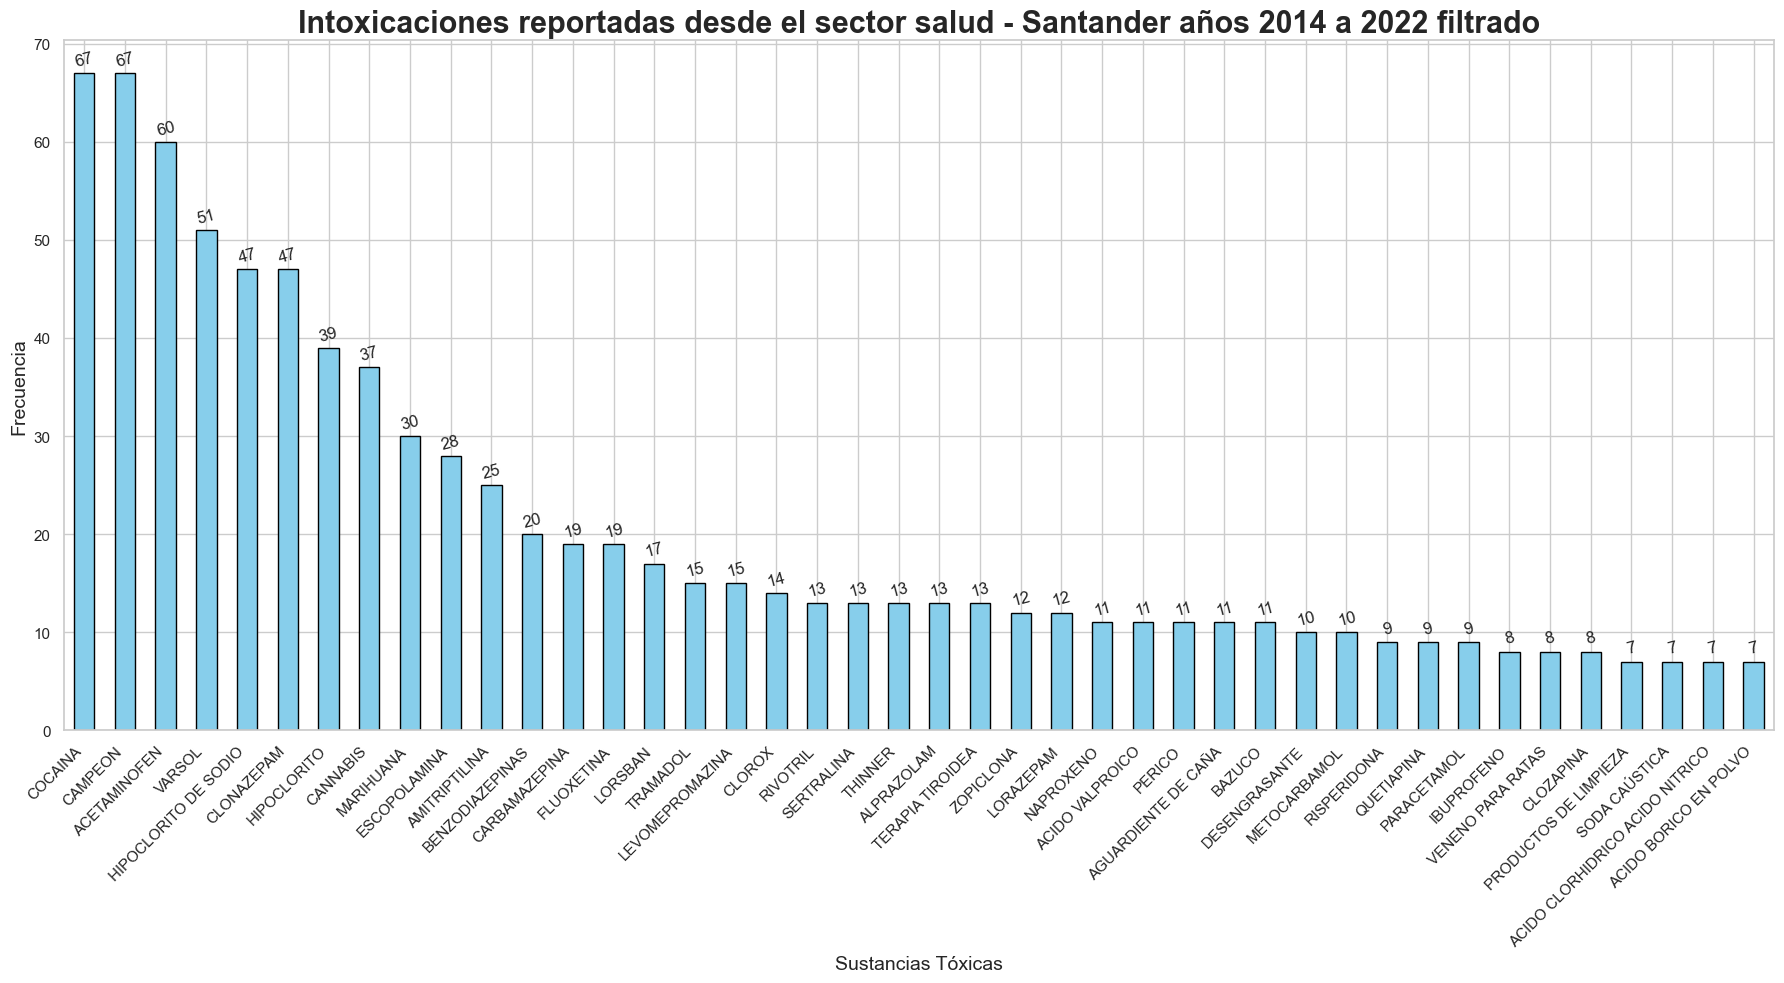

In [641]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(18, 10))

# Excluir las sustancias tóxicas no deseadas
excluir_sustancias = ["DESCONOCIDO", "DESCONOCIDA", "SIN INFORMACIÓN"]
frecuencia_intoxicaciones = intoxicaciones_df_renombrado['sustancias toxicas'].value_counts()
frecuencia_filtrada = frecuencia_intoxicaciones[~frecuencia_intoxicaciones.index.isin(excluir_sustancias)]
frecuencia_filtrada = frecuencia_filtrada[frecuencia_filtrada >= 7]

ax = frecuencia_filtrada.plot(kind='bar', color='skyblue', edgecolor='black')

umbral = 50

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', rotation=15)

plt.xticks(rotation=45, ha='right')

# Ajustar el título con fuente en negrita y más grande
plt.title('Intoxicaciones reportadas desde el sector salud - Santander años 2014 a 2022 filtrado', fontsize=22, fontweight='bold')

plt.xlabel('Sustancias Tóxicas', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.tight_layout()
plt.show()


Descripción

El grafico muestra la frecuencia filtrada de las sustancias tóxicas reportadas en intoxicaciones años 2014-2022.

Acciones

Se filtra el conjunto de datos y se excluyen las sustancias tóxicas que a lo largo de los años no muestran mayor relevancia epidemiológica más alla de la simple casualidad, y las presentes en menos de 7 eventos en total.

Se excluyeron para esta segunda gráfica del Conjunto de Datos las intoxicaciones generadas por sustancias registradas como desconocidas o sin información.

Conclusiones


Las sustancias cocaina y campeon son las de mayor incidencia epidemiológica a lo largo del tiempo con 67 casos cada una. 

Las sustancias de menor incidencia fueron: productos de limpieza, soda caustica, acidos clorhidrico y nitrico y acido borico con 7 casos cada una.

Se resalta  del conjunto de datos en general el hecho de que la mayoría de intoxicaciones son producidas por sustancias Desconocidas, sin información etc.

Se sugiere que o bien los pacientes no tienen claridad sobre el o los detonantes de sus sintomas o bien no desean registrarlos.

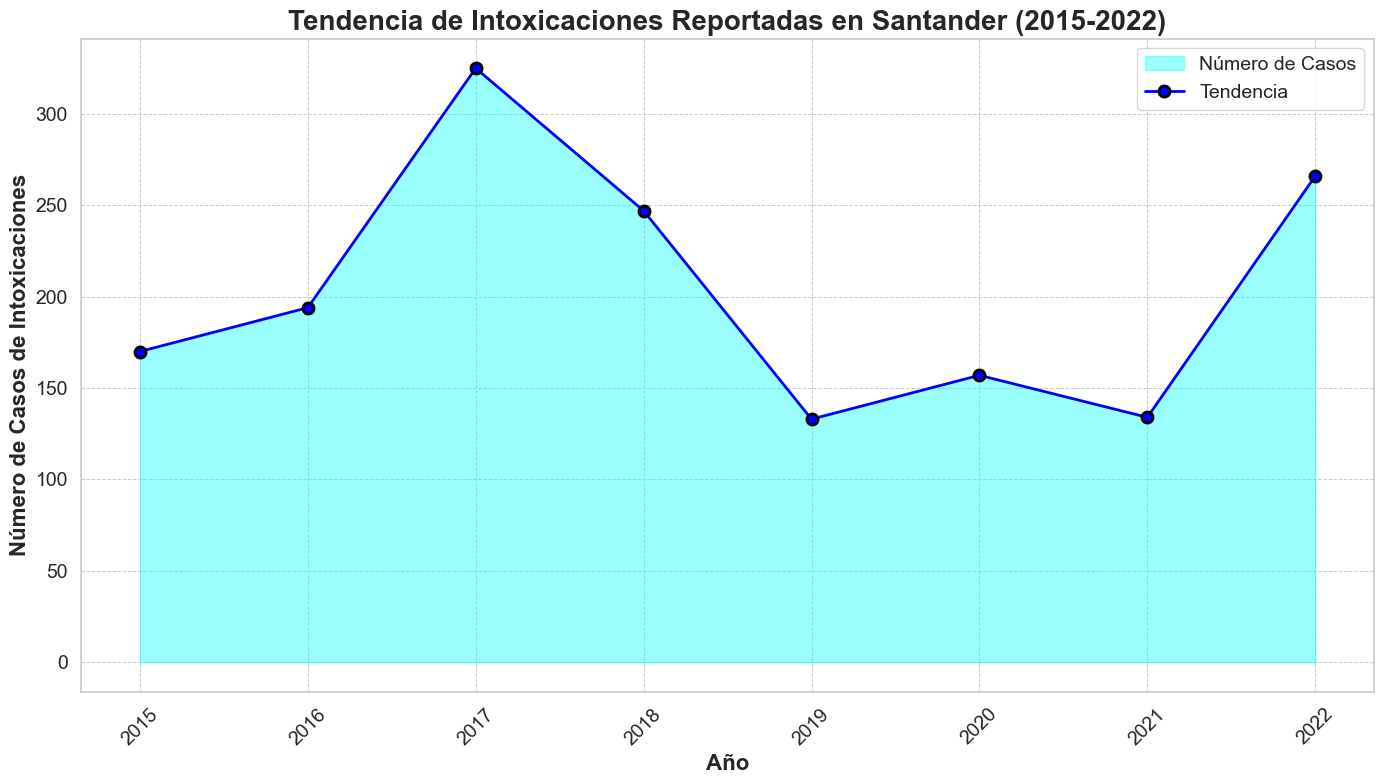

In [642]:
import matplotlib.pyplot as plt
import pandas as pd

# Filtrar el DataFrame para excluir el año 2014 y mostrar datos a partir de 2015
intoxicaciones_filtradas = intoxicaciones_df_renombrado[intoxicaciones_df_renombrado['periodo'] >= 2015]

# Agrupar los datos por año y contar las intoxicaciones reportadas
intoxicaciones_por_año = intoxicaciones_filtradas.groupby('periodo').size()

# Crear el gráfico combinado de área y línea
plt.figure(figsize=(14, 8))

# Área
plt.fill_between(intoxicaciones_por_año.index, intoxicaciones_por_año.values, color='cyan', alpha=0.4, label='Número de Casos')

# Línea
plt.plot(intoxicaciones_por_año.index, intoxicaciones_por_año.values, 
         marker='o', linestyle='-', color='blue', 
         linewidth=2, markersize=8, markeredgecolor='black', markeredgewidth=2, label='Tendencia')

# Configuración de etiquetas y título
plt.title('Tendencia de Intoxicaciones Reportadas en Santander (2015-2022)', fontsize=20, fontweight='bold')
plt.xlabel('Año', fontsize=16, fontweight='bold')
plt.ylabel('Número de Casos de Intoxicaciones', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14, rotation=45)  # Ajuste del tamaño y rotación de las etiquetas del eje x
plt.yticks(fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.7)

# Leyenda
plt.legend(fontsize=14)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Descripción


Este gráfico muestra la tendencia de las intoxicaciones reportadas en Santander desde el año 2015 hasta el 2022.

Conclusiones

2016: Se observa una tendencia al alza en el número de casos, con un incremento notable.

2017: Presenta un crecimiento exponencial en el número de intoxicaciones, alcanzando un punto alto.

2018: Se experimenta una disminución en los casos, marcando un recorte significativo respecto al año anterior.

2019: Los casos se corrigen a la baja, situándose por debajo de la media de los años previos.

2020: Hay una leve tendencia alcista en el número de intoxicaciones.

2021: La tendencia alcista del año anterior se corrige ligeramente, mostrando una estabilidad con una ligera reducción.

2022: Se observa una fuerte subida en el número de casos, superando los 250 casos y destacándose claramente por encima del promedio de los años anteriores.

Esta descripción refleja las fluctuaciones anuales en el número de intoxicaciones y proporciona una visión general clara de cómo varió la incidencia a lo largo del tiempo.

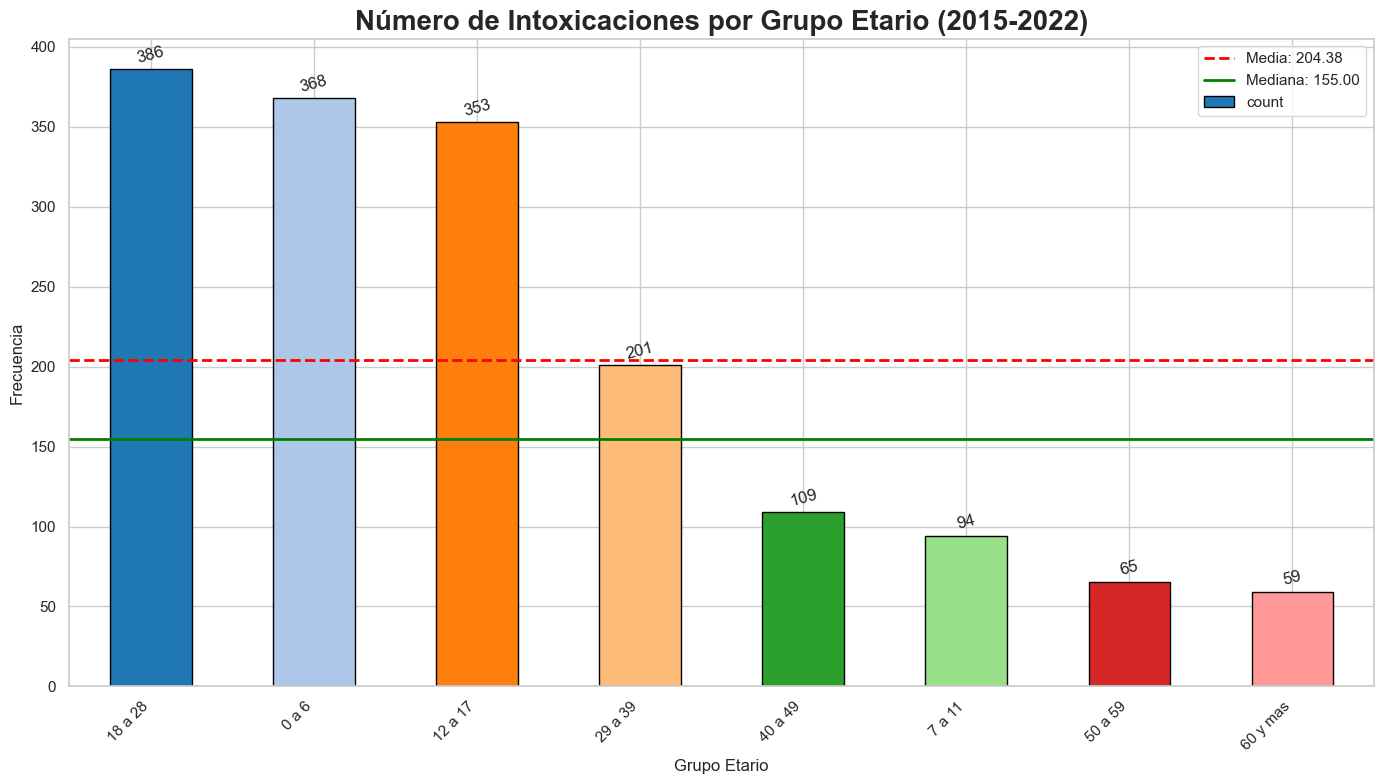

In [644]:
import matplotlib.pyplot as plt
import seaborn as sns

# Verificar que la columna 'grupo etario' existe
if 'grupo etario' not in intoxicaciones_df_renombrado.columns:
    raise KeyError("La columna 'grupo etario' no se encuentra en el DataFrame.")

# Filtrar y contar el número de intoxicaciones por grupo etario
grupo_etario_counts = intoxicaciones_df_renombrado['grupo etario'].value_counts()

# Crear una paleta de colores
colors = sns.color_palette("tab20", n_colors=len(grupo_etario_counts))

plt.figure(figsize=(14, 8))
ax = grupo_etario_counts.plot(kind='bar', color=colors, edgecolor='black')

# Calcular medidas de tendencia central
mean_value = grupo_etario_counts.mean()
median_value = grupo_etario_counts.median()

# Añadir etiquetas de frecuencia
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', rotation=15)

# Añadir líneas para la media y la mediana
plt.axhline(y=mean_value, color='red', linestyle='--', linewidth=2, label=f'Media: {mean_value:.2f}')
plt.axhline(y=median_value, color='green', linestyle='-', linewidth=2, label=f'Mediana: {median_value:.2f}')

plt.xticks(rotation=45, ha='right')
plt.title('Número de Intoxicaciones por Grupo Etario (2015-2022)', fontsize=20, fontweight='bold')
plt.xlabel('Grupo Etario')
plt.ylabel('Frecuencia')

# Añadir leyenda
plt.legend()

plt.tight_layout()
plt.show()


Descripción

El grafico es un histograma de barras que muestra el número de intoxicaciones registradas clasificadas por grupo etario en el período de 2015 a 2022.


Cada barra representa la frecuencia de intoxicaciones en un grupo etario específico, y su altura indica la frecuencia de intoxicaciones dentro de ese grupo. 

Los colores ayuda a diferenciar claramente cada grupo, y las etiquetas sobre las barras muestran el conteo exacto de casos para cada Grupo Etario. 


conclusiones

El promedio de intoxicaciones distribuido entre los diferentes grupos estarios es de 204 casos y su valor mediano como muestra la grafica 155.

La población más afectada se encuentra en los Grupos Etarios 0 a 6 y 18 a 28 y la menos los mayores de 59.



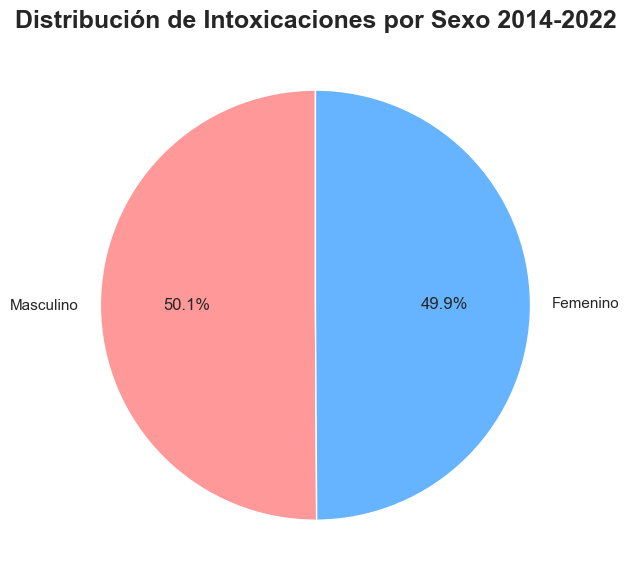

In [645]:
import matplotlib.pyplot as plt

# Contar el número de intoxicaciones por sexo
sexo_counts = intoxicaciones_df_renombrado['SEXO'].value_counts()

plt.figure(figsize=(8, 6))
ax = sexo_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'], startangle=90)
plt.title('Distribución de Intoxicaciones por Sexo 2014-2022', fontdict={'fontsize': 18, 'fontweight': 'bold'})
plt.ylabel('')
plt.tight_layout()
plt.show()


Descripción: 


El gráfico muestra la distribución porcentual de las intoxicaciones según el sexo. 

Cada segmento del gráfico representa la proporción de casos para cada género.


Conclusiones


Como se observa en el gráfico, los casos de intoxicaciones en el conjunto de datos en general indican que hombres y mujeres se ven afectados en una proporción muy semejante de casi 1 a 1.

<Figure size 1600x800 with 0 Axes>

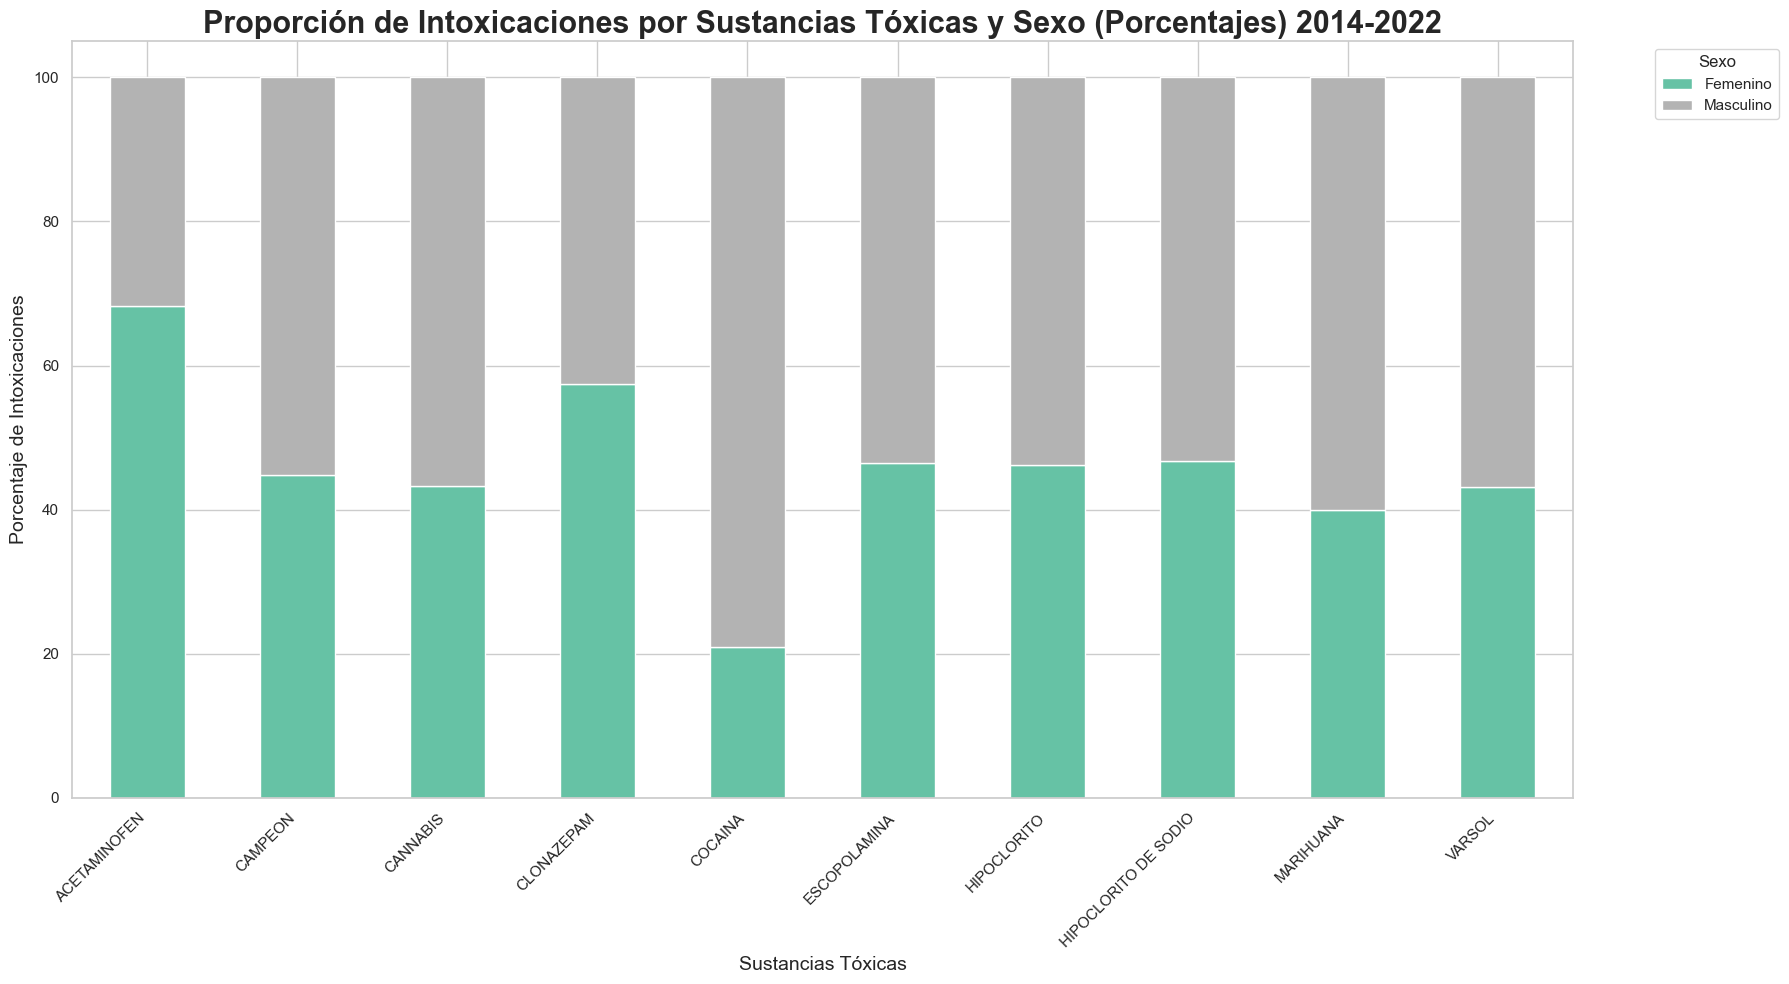

In [646]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar las sustancias tóxicas para obtener las 10 con mayor incidencia
excluir_sustancias = ["DESCONOCIDO", "DESCONOCIDA", "SIN INFORMACIÓN"]
frecuencia_intoxicaciones = intoxicaciones_df_renombrado['sustancias toxicas'].value_counts()
frecuencia_filtrada = frecuencia_intoxicaciones[~frecuencia_intoxicaciones.index.isin(excluir_sustancias)]
top_10_sustancias = frecuencia_filtrada.head(10).index

# Filtrar el DataFrame para solo incluir las 10 sustancias con mayor incidencia
df_top_10 = intoxicaciones_df_renombrado[intoxicaciones_df_renombrado['sustancias toxicas'].isin(top_10_sustancias)]

# Crear una tabla de contingencia para el conteo de intoxicaciones por sustancia y sexo
contingencia_intoxicaciones_sexo = pd.crosstab(index=df_top_10['sustancias toxicas'], columns=df_top_10['SEXO'])

# Normalizar por fila para obtener proporciones de intoxicaciones por sustancia y sexo
contingencia_intoxicaciones_normalizada = contingencia_intoxicaciones_sexo.div(contingencia_intoxicaciones_sexo.sum(axis=1), axis=0)

# Convertir las proporciones a porcentajes
contingencia_intoxicaciones_porcentajes = contingencia_intoxicaciones_normalizada * 100

# Graficar la proporción de intoxicaciones en porcentajes
plt.figure(figsize=(16, 8))
contingencia_intoxicaciones_porcentajes.plot(kind='bar', stacked=True, colormap='Set2', figsize=(18, 10))

# Ajustar el título con fuente en negrita y más grande
plt.title('Proporción de Intoxicaciones por Sustancias Tóxicas y Sexo (Porcentajes) 2014-2022', fontsize=22, fontweight='bold')

plt.xlabel('Sustancias Tóxicas', fontsize=14)
plt.ylabel('Porcentaje de Intoxicaciones', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sexo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Descripciòn


El grafico muestra la proporción de sexos afectados por las 10 sustancias tóxicas con mayor incidencia de intoxicaciones.

Eje X: Listado de las 10 sustancias tóxicas con mayor número de intoxicaciones.

Eje Y: Proporción de intoxicaciones para cada sexo, expresada en porcentaje.

Cada barra representa una sustancia tóxica, y está segmentada por colores que indican el sexo (masculino o femenino). Las barras están apiladas para mostrar la distribución porcentual de cada sexo dentro de cada sustancia tóxica.

Compara cómo varía la proporción de intoxicaciones entre hombres y mujeres para cada una de las sustancias más frecuentes.

Este gráfico proporciona una visión clara y comparativa del impacto por sexo para cada una de las principales sustancias tóxicas, facilitando la identificación de patrones y diferencias en la incidencia de intoxicaciones entre géneros.

Conclusiones


Aproximadamente el 70% de las mujeres sufrió intoxicaciónes con acetaminofen contra un 30% aproximado de los hombres.

Aproximadamente el 45% de las mujeres sufrió intoxicaciones con campeon contra un 55% de los hombres.

Aproximadamente el 42% de las mujeres sufrio intoxicaciones por cannabis contra un 58% de los hombres.

Aproximadamente el 57% de las mujeres sufrio intoxicaciones por clonazepam contra un 43% de los hombres.

Aproximadamente el 80% de los hombres sufrió intoxicaciones por cocaina contra un 20% de las mujeres.

Aproximadamente el 55% de los hombres sufrió intoxicaciones por Escopolamina contra un 45% de mujeres.

Aproximadamente el 55% de los hombres sufrió intoxicaciones por Escopolamina contr aun 45% de mujeres.

Aproximadamente el 60% de los hoombres sufrió intoxicaciones por Marihuana contra un 40% de mujeres.

Aproximadamente el 43% de mujeres sufrió intoxicaciones por Varsol contra un 57% de los hombres.


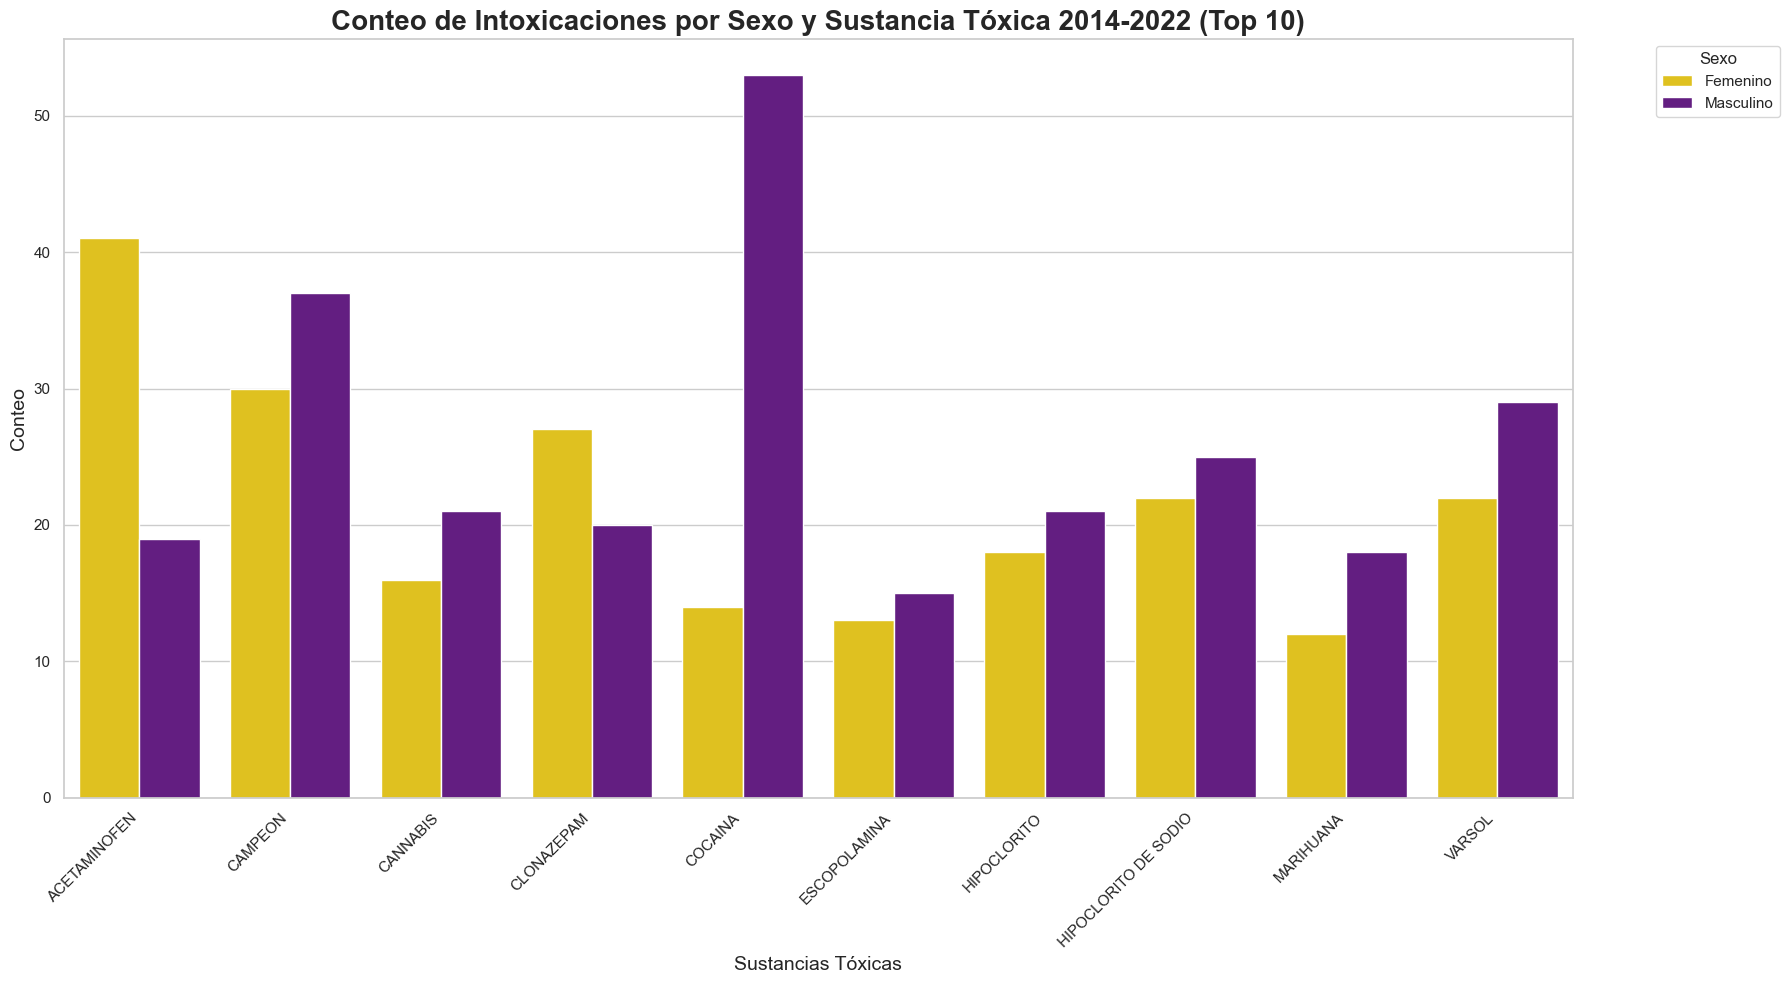

In [647]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar las sustancias tóxicas para obtener las 10 con mayor incidencia
excluir_sustancias = ["DESCONOCIDO", "DESCONOCIDA", "SIN INFORMACIÓN"]
frecuencia_intoxicaciones = intoxicaciones_df_renombrado['sustancias toxicas'].value_counts()
frecuencia_filtrada = frecuencia_intoxicaciones[~frecuencia_intoxicaciones.index.isin(excluir_sustancias)]
top_10_sustancias = frecuencia_filtrada.head(10).index

# Filtrar el DataFrame para solo incluir las 10 sustancias con mayor incidencia
df_top_10 = intoxicaciones_df_renombrado[intoxicaciones_df_renombrado['sustancias toxicas'].isin(top_10_sustancias)]

# Crear una tabla de contingencia para el conteo de sexo por sustancia
contingencia_sexo = pd.crosstab(index=df_top_10['sustancias toxicas'], columns=df_top_10['SEXO'])

# Convertir la tabla de contingencia en formato largo para graficar con seaborn
contingencia_sexo_long = contingencia_sexo.reset_index().melt(id_vars='sustancias toxicas', var_name='SEXO', value_name='Conteo')

# Definir una paleta de colores personalizados (amarillo y morado metalizados)
colores_personalizados = ['#FFD700', '#6A0D91']  # Amarillo metalizado y morado metalizado

# Graficar la proporción de sexos
plt.figure(figsize=(18, 10))
sns.barplot(data=contingencia_sexo_long, x='sustancias toxicas', y='Conteo', hue='SEXO', palette=colores_personalizados)

# Ajustar el título con fuente en negrita y más grande
plt.title('Conteo de Intoxicaciones por Sexo y Sustancia Tóxica 2014-2022 (Top 10)', fontsize=20, fontweight='bold')

plt.xlabel('Sustancias Tóxicas', fontsize=14)
plt.ylabel('Conteo', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sexo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Descripcion

El gráfico presenta el conteo de intoxicaciones por sexo y sustancia tóxica para las 10 sustancias más frecuentes. 

El gráfico de barras compara la incidencia de cada sustancia tóxica entre los diferentes géneros.

El eje X muestra las sustancias tóxicas seleccionadas, mientras que el eje Y indica el número de casos reportados. 


Acciones 

Se filtraron del conjunto de datos las sustancias desconocidas o sin información.

Conclusiones

La intoxicación por cocaina afecta a hombres en una una proporción de 4 a 1 respecto de las mujeres.

El intoxicación por acetaminofen afecta a las mujeres en una proporción mayor de 2 a 7 con respecto a los hombres.

Las intoxicaciones con Clonazepam una benzodiacepina afectan en mayor proporción a mujeres que a hombres.

Del conjunto filtrado top10 de sustancias toxicas analizado se evidencia que sólo en 2 las mujeres presentan una mayor incidencia y que en las demás los hombres tienen una mayor afectación.

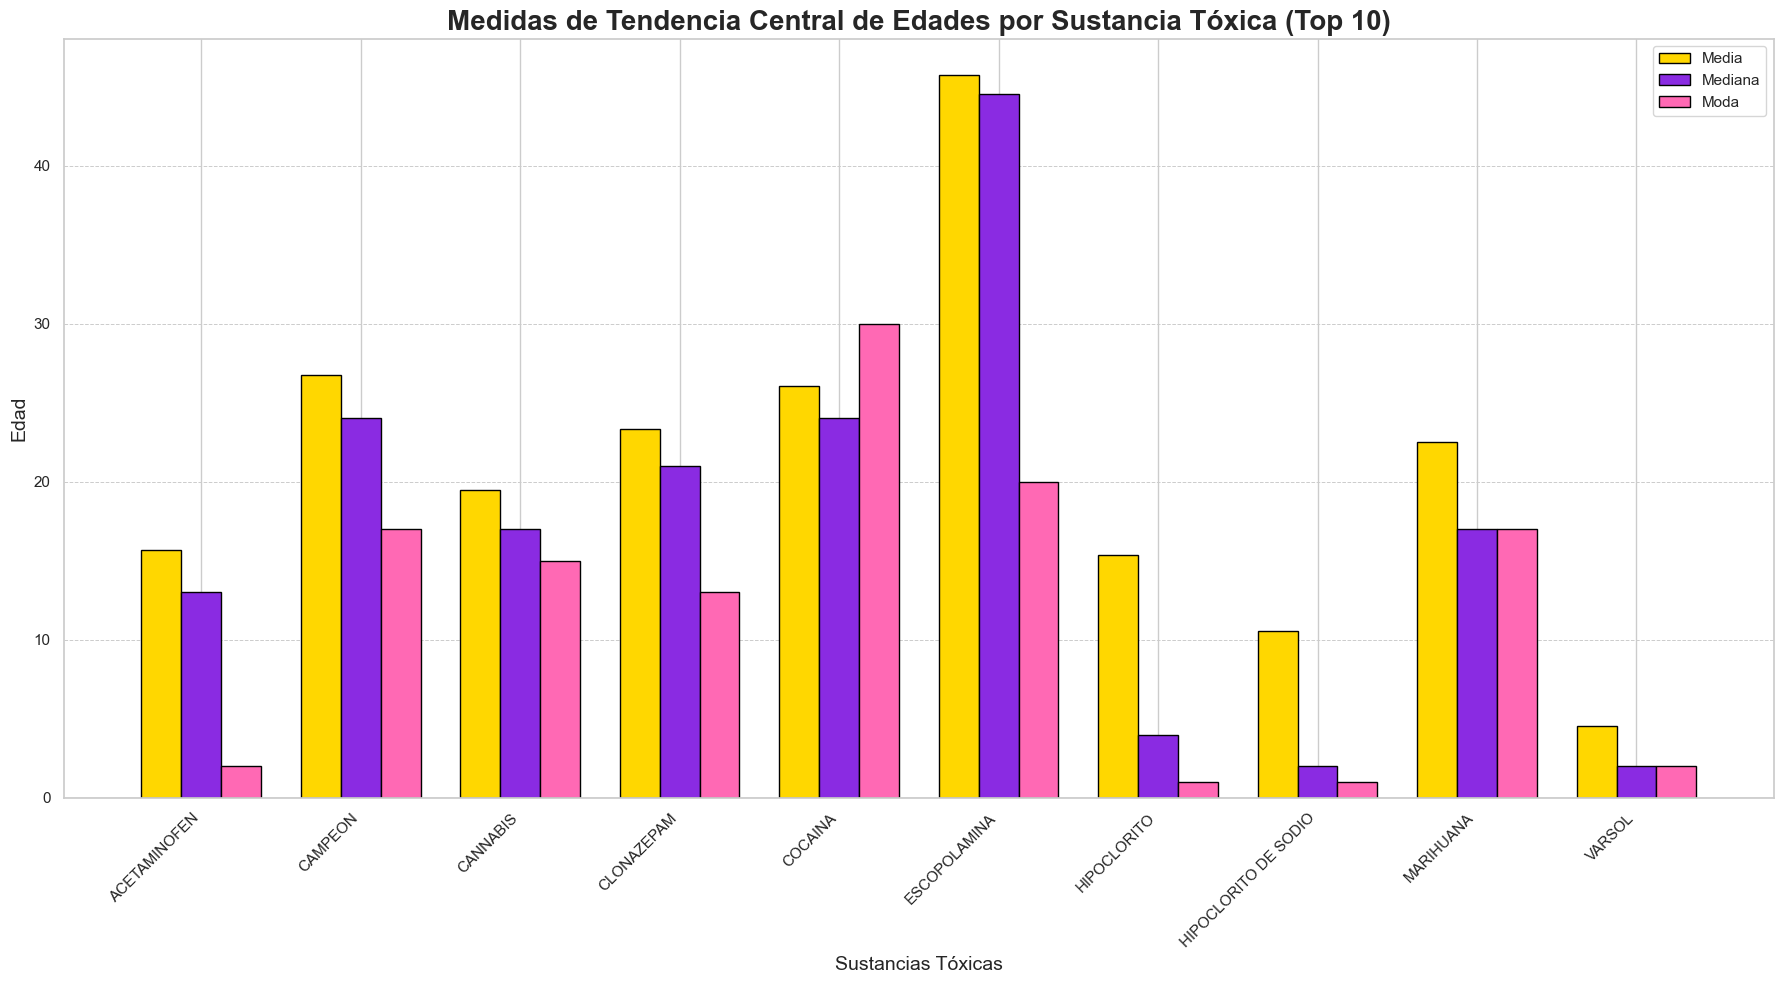

In [648]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que ya tienes el DataFrame 'df_top_10' y el cálculo de medidas de tendencia central
# Asegúrate de haber ejecutado previamente el cálculo de 'medidas_tendencia_central'

# Configuración del estilo y tamaño de la gráfica
plt.figure(figsize=(18, 10))

# Crear un gráfico de barras para las medidas de tendencia central
x = medidas_tendencia_central['sustancias toxicas']
bar_width = 0.25  # Ancho de las barras
index = range(len(x))

# Crear barras para Media, Mediana y Moda
plt.bar(index, medidas_tendencia_central['Media'], bar_width, label='Media', color='#FFD700', edgecolor='black')  # Amarillo brillante
plt.bar([i + bar_width for i in index], medidas_tendencia_central['Mediana'], bar_width, label='Mediana', color='#8A2BE2', edgecolor='black')  # Morado intenso
plt.bar([i + 2 * bar_width for i in index], medidas_tendencia_central['Moda'], bar_width, label='Moda', color='#FF69B4', edgecolor='black')  # Fucsia brillante

# Ajustar las etiquetas del eje x y el título
plt.xlabel('Sustancias Tóxicas', fontsize=14)
plt.ylabel('Edad', fontsize=14)
plt.title('Medidas de Tendencia Central de Edades por Sustancia Tóxica (Top 10)', fontsize=20, fontweight='bold')
plt.xticks([i + bar_width for i in index], x, rotation=45, ha='right')

# Añadir leyenda
plt.legend()

# Añadir líneas horizontales para mejorar la legibilidad
plt.axhline(y=0, color='black', linewidth=0.8)
plt.grid(axis='y', linestyle='--', linewidth=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


Descripción

El gráfico muestra las medidas de tendencia central (Media, Mediana y Moda) de las edades asociadas a las 10 principales sustancias tóxicas en el conjunto de datos.
Cada grupo de barras representa una sustancia tóxica y compara las tres medidas para cada una:

Media (barras amarillas): Representa el promedio de edades.
Mediana (barras moradas): Indica el valor central de las edades.
Moda (barras fucsias): Muestra la edad que más frecuentemente aparece.
Las barras están claramente diferenciadas por color y agrupadas para facilitar la comparación. 
Las etiquetas del eje x identifican las sustancias tóxicas y el eje y muestra las edades. 

El gráfico también incluye una línea horizontal en el valor cero y una cuadrícula vertical para mejorar la legibilidad.

El grafico proporciona una visión clara y comparativa de las edades típicas asociadas con las principales sustancias tóxicas, permitiendo una fácil interpretación de las tendencias centrales en los datos.


Conclusiones


Para la sustancia Acetaminofen la edad promedio de intoxicaciones es de 16 años mientras que la mediana está en 13 y la moda se presenta en infantes del grupo etario 0 a 6.


Para la sustancia Campeon el promedio de intoxicaciones se da hacia los 26 años, siendo los 24 años la mediana y la moda se ubica en edades de 28 años.


Para la sustancia Cannabis la edad promedio de intoxicaciones es de 19 años mientras que la mediana está en 17 años y la moda se presenta 14 años siendo los adolescentes los mayormente afectados.

Para la sustancia Clonazepam el promedio de intoxicaciones se da hacia los 23 años, siendo los 21 años la mediana de edad 13 años.

Para la sustancia Cocaina el promedio de intoxicaciones se da hacia los 26 años, siendo los 24 años la mediana de edad y los 30 años la moda.

Para la sustancia Escopolamina el promedio de intoxicaciones se da hacia los 47 años, siendo los 46 años la mediana de edad y los 20 años la moda.


Para la sustancia Hipoclorito el promedio de intoxicaciones se da hacia los 15 años, siendo los 5 años la mediana de edad y los 2 años la moda.


Para la sustancia Hipoclorito de sodio el promedio de intoxicaciones se da hacia los 11 años, siendo los 4 años la mediana de edad y los 2 años la moda.


Para la sustancia Marihuana el promedio de intoxicaciones se da hacia los 23 años, siendo los 18 años la mediana de edad y los 18 años la moda.

Para la sustancia Varsol el promedio de intoxicaciones se da hacia los 4 años, siendo los 2 años la mediana de edad y los 2 años la moda.





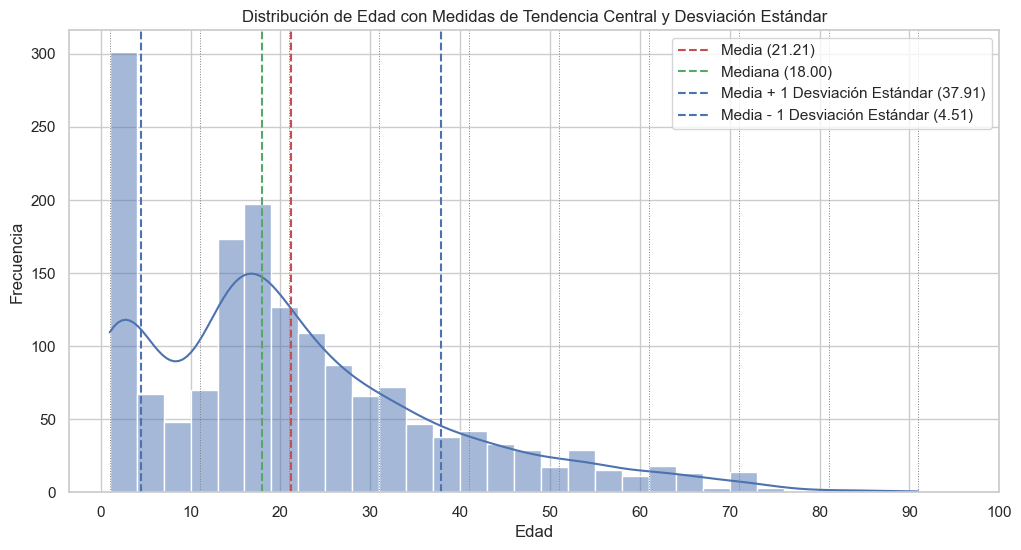

In [649]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Crear la figura
plt.figure(figsize=(12, 6))

# Histograma con KDE
sns.histplot(intoxicaciones_df_renombrado['edad'], kde=True, bins=30)

# Medidas de tendencia central
mean_age = intoxicaciones_df_renombrado['edad'].mean()
median_age = intoxicaciones_df_renombrado['edad'].median()
std_dev = intoxicaciones_df_renombrado['edad'].std()

# Línea vertical para la media
plt.axvline(mean_age, color='r', linestyle='--', label=f'Media ({mean_age:.2f})')

# Línea vertical para la mediana
plt.axvline(median_age, color='g', linestyle='--', label=f'Mediana ({median_age:.2f})')

# Líneas verticales para la desviación estándar
plt.axvline(mean_age + std_dev, color='b', linestyle='--', label=f'Media + 1 Desviación Estándar ({mean_age + std_dev:.2f})')
plt.axvline(mean_age - std_dev, color='b', linestyle='--', label=f'Media - 1 Desviación Estándar ({mean_age - std_dev:.2f})')

# Opcional: Añadir líneas verticales cada cierto intervalo (ejemplo: cada 10 años)
for year in range(int(intoxicaciones_df_renombrado['edad'].min()), int(intoxicaciones_df_renombrado['edad'].max()) + 1, 10):
    plt.axvline(year, color='grey', linestyle=':', linewidth=0.7)

# Configuración del gráfico
plt.title('Distribución de Edad con Medidas de Tendencia Central y Desviación Estándar')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

# Configuración de los ticks del eje x
plt.xticks(ticks=np.arange(0, int(intoxicaciones_df_renombrado['edad'].max()) + 10, 10), 
           labels=[f'{int(x)}' for x in np.arange(0, int(intoxicaciones_df_renombrado['edad'].max()) + 10, 10)])

plt.legend()
plt.show()


Descripcion

Este grafico muestra las Medidas de Tendencia Central:

Media (en rojo, línea discontinua): Indica el promedio de edades.
Mediana (en verde, línea discontinua): Muestra el valor central de la distribución, donde la mitad de las observaciones son menores y la otra mitad son mayores.
Desviación Estándar:

Líneas en azul (líneas discontinuas): Representan una desviación estándar por encima y por debajo de la media, mostrando la variabilidad en la edad.
Marcas Adicionales:

Líneas verticales grises: Estas líneas, situadas cada 10 años, ayudan a visualizar intervalos de edad importantes.Este gráfico es una combinación de un histograma y una estimación de la densidad de probabilidad (KDE) que proporciona una visión completa de la distribución de la variable edad.

Ejes: El eje X representa las edades, mientras que el eje Y muestra la frecuencia de ocurrencia de cada rango de edad.
Ticks: Los valores en el eje X están marcados cada 10 años para facilitar la interpretación.
El gráfico proporciona una visión clara y completa sobre la distribución de edades en tu conjunto de datos, con referencias visuales a la media, mediana y variabilidad de las edades.


Conclusiones

La edad de 4 años presenta una la mayor frecuencia de intoxicaciones de todo el conjuto de datos con 300 casos aprox por fuera de la desviación estandar negativa.

La edad linea media en rojo y la mediana nos indica que es entre las edades de 17 y 21 años dónde se da el mayor número de casos de todo el conjunto indicando que estos grupo poblacional es el mayormente afectado.

La linea azul describe una fuerte caida en la incidencia de casos a partir de la edad promedio cayendo proporcionalmente al incremento de la edad. Vemos cómo para la edad de 80 años la curva se ha aplanado casi por completo con el eje.

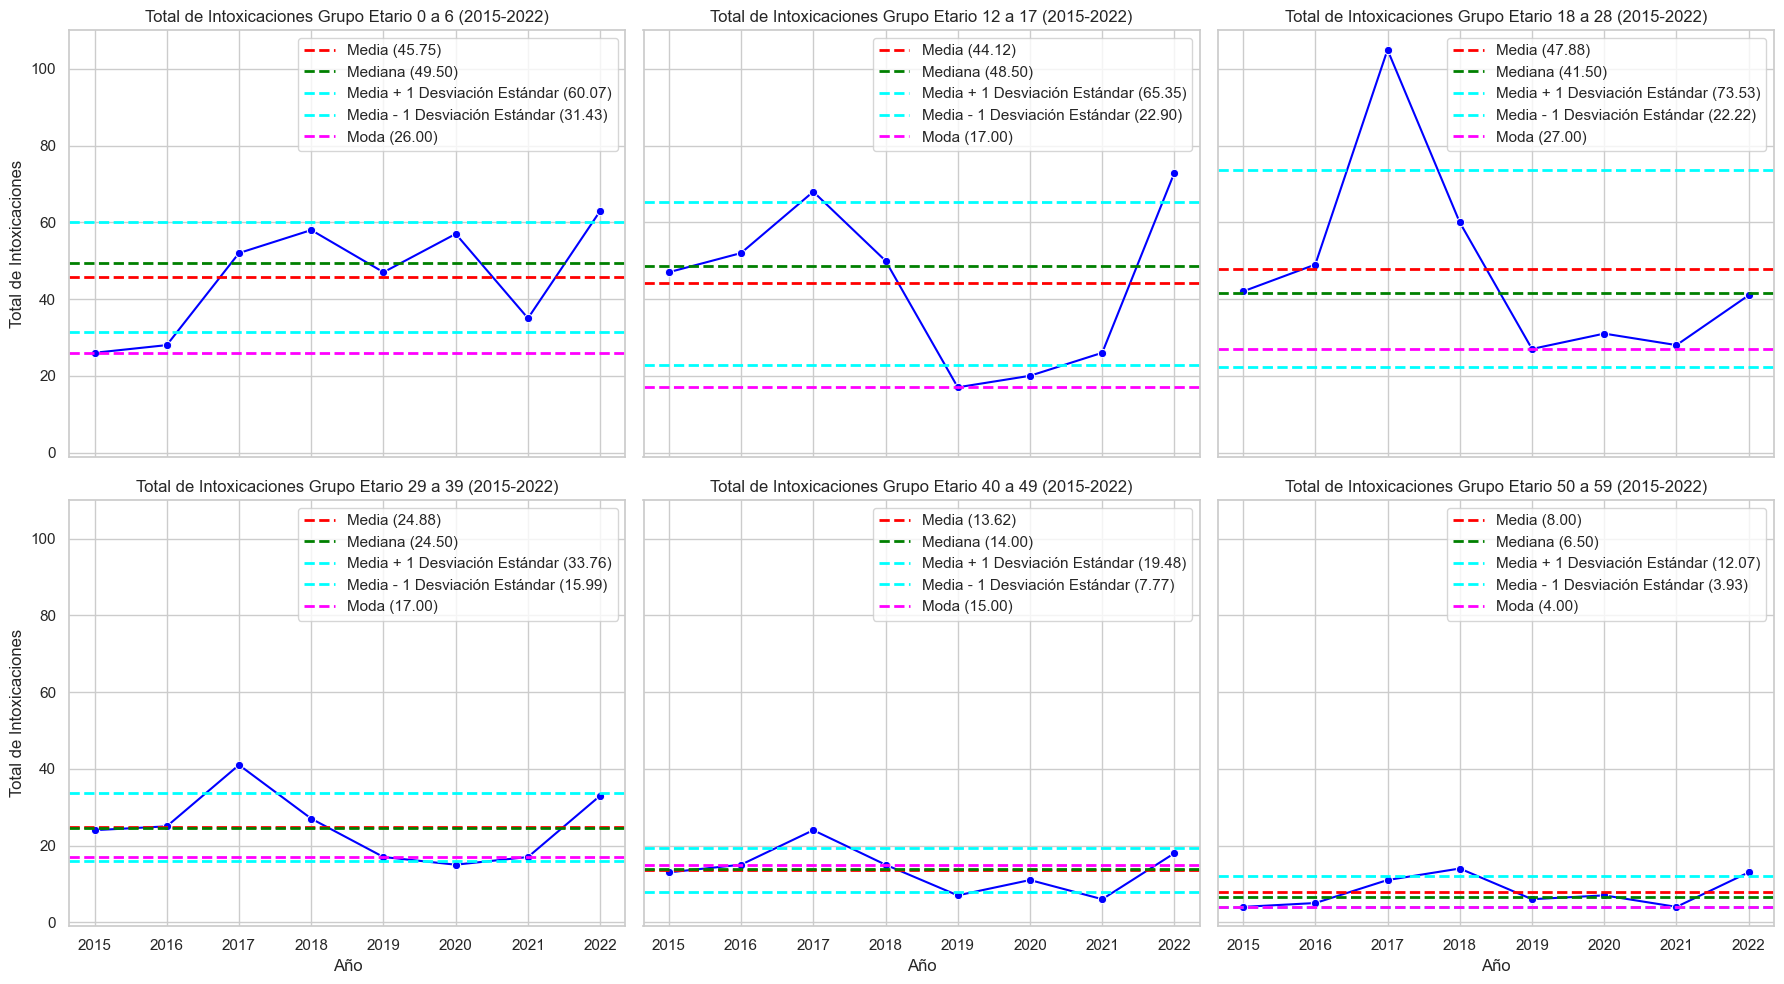

In [650]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filtrar los datos para los años 2015 a 2022
df_filtrado = intoxicaciones_df_renombrado[
    (intoxicaciones_df_renombrado['periodo'] >= 2015) &
    (intoxicaciones_df_renombrado['periodo'] <= 2022)
]

# Agrupar los datos por grupo etario y periodo, y contar el número total de intoxicaciones
df_agrupado = df_filtrado.groupby(['periodo', 'grupo etario']).size().reset_index(name='total_intoxicaciones')

# Definir los grupos etarios y limitar a los primeros seis
grupos_etarios = df_agrupado['grupo etario'].unique()
grupos_etarios = grupos_etarios[:6]  # Seleccionar solo los primeros seis grupos etarios

# Crear una figura y una cuadrícula de subgráficos
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10), sharex=True, sharey=True)

# Aplanar el array de ejes para facilitar la iteración
axes = axes.flatten()

for idx, grupo in enumerate(grupos_etarios):
    df_grupo = df_agrupado[df_agrupado['grupo etario'] == grupo]
    
    # Calcular medidas de tendencia central
    mean_total = df_grupo['total_intoxicaciones'].mean()
    median_total = df_grupo['total_intoxicaciones'].median()
    std_dev_total = df_grupo['total_intoxicaciones'].std()
    
    # Calcular la moda (puede haber múltiples modas, tomaremos la primera)
    mode_total = df_grupo['total_intoxicaciones'].mode()
    mode_total = mode_total[0] if not mode_total.empty else None
    
    # Crear un gráfico de líneas para total de intoxicaciones
    sns.lineplot(data=df_grupo, x='periodo', y='total_intoxicaciones', marker='o', color='blue', ax=axes[idx])
    
    # Añadir líneas para la media, mediana, desviación estándar y moda
    axes[idx].axhline(mean_total, color='red', linestyle='--', linewidth=2, label=f'Media ({mean_total:.2f})')
    axes[idx].axhline(median_total, color='green', linestyle='--', linewidth=2, label=f'Mediana ({median_total:.2f})')
    axes[idx].axhline(mean_total + std_dev_total, color='cyan', linestyle='--', linewidth=2, label=f'Media + 1 Desviación Estándar ({mean_total + std_dev_total:.2f})')
    axes[idx].axhline(mean_total - std_dev_total, color='cyan', linestyle='--', linewidth=2, label=f'Media - 1 Desviación Estándar ({mean_total - std_dev_total:.2f})')
    if mode_total is not None:
        axes[idx].axhline(mode_total, color='magenta', linestyle='--', linewidth=2, label=f'Moda ({mode_total:.2f})')
    
    # Configuración del gráfico
    axes[idx].set_title(f'Total de Intoxicaciones Grupo Etario {grupo} (2015-2022)')
    axes[idx].set_xlabel('Año')
    axes[idx].set_ylabel('Total de Intoxicaciones')
    axes[idx].legend()
    axes[idx].grid(True)

# Ocultar subplots no utilizados
for idx in range(len(grupos_etarios), len(axes)):
    axes[idx].set_visible(False)

# Ajustar el layout
plt.tight_layout()
plt.show()


Configuración grafica

El eje x del gráfico representa los años (o el periodo). Cada punto en el eje x corresponde a un año específico (por ejemplo, 2015, 2016, 2017, etc.).
En el gráfico, el eje x está etiquetado como "Año". Los valores en este eje muestran los años en los que se registraron las intoxicaciones.
Puntos en la Línea:

Cada punto en la línea de tendencia representa el total de intoxicaciones para un año específico.
La línea de tendencia conecta estos puntos para mostrar cómo cambian los datos a lo largo del tiempo.

Análisis y conclusiones

Grupo Etario de 0 a 6:

Vemos cómo se triplicó el número de intoxicaciones entre los años 2015 y 2022. Particularmente 2017 representó un incremento exponencial de  casos que se mantienen constantes hasta el año 2021, dónde hay una fuerte corrección por debajo del promedio.

En el año 2022 se registra un nuevo salto exponencial de casos; relevante; puesto que los casos reportados por la Entidad van sólo hasta el día 15 de octubre de 2022.

Grupo Etario de 7 a 11:

Vemos cómo el grafico describe una tendencia lateral con desviaciones no significativas de la linea media para el año 2018 y por debajo del promedio del conjunto de los años resalta la menor incidencia en el tiempo.

Grupo Etario de 12 a 17:

Este Grupo Etario tiene promedios cercanos al promédio máximos del conjunto de datos en general, marca en los años 2015 y 2016 una tendencia alcista acentuada en 2017 hasta al rededor de 70 casos, superando el pico dado en 2022 para el grupo Etario de 0 a 6.

El 2018 marca un ajuste proporcional al incremento de casos de 2017 aunque se mantiene por encima de linea media del conjunto de datos. 

En 2019 se da la más grande caida de casos dentro del conjunto de los años hasta niveles cercanos a la linea media de los Grupo Etario 7 a 11 y 40 a 49.

Grupo Etario de 18 a 28:

Este cuarto Grupo considerado ordinalmente de izquierda a derecha y de arriba abajo muestra una linea media y mediana concordantes con los Grupos Etarios 1 y 3 (0 a 6 y 12 a 17). 

El año 2016 dibuja una leve tendencia alcista exponencialmente verticalizada en  2017 hasta denotar el máximo historico del conjunto de casos (más de 100) . 

En contraste, el 2018 revela una abrupta caida por debajo de los 30 casos, que se mantiene con variaciones por debajo de la mediana hasta 2022 donde muestra un leve repunte.


Grupo Etario 29 a 39:

Este quinto es el más mediano del conjunto, exhibe un incremento de casos en 2017 y un reajuste o caida causi proporcional en 2018.
presenta además una leve caida de casos con desplazamiento lateral hasta el años 2022 que dibuja un considerable repunte.

Grupo Etario 40 a 49:

Con excepción del tipico incremento de 2017 y del también generalizado reajuste de 2018, este conjunto es el segundo de mayor movimiento más lateral, con minimas fluctuaciones. EL 2022 supuso un incremento de casos que resalta por superar la linea media con gran fuerza pero sin superar el máximo historico del grupo de 20 casos.


<Figure size 1400x800 with 0 Axes>

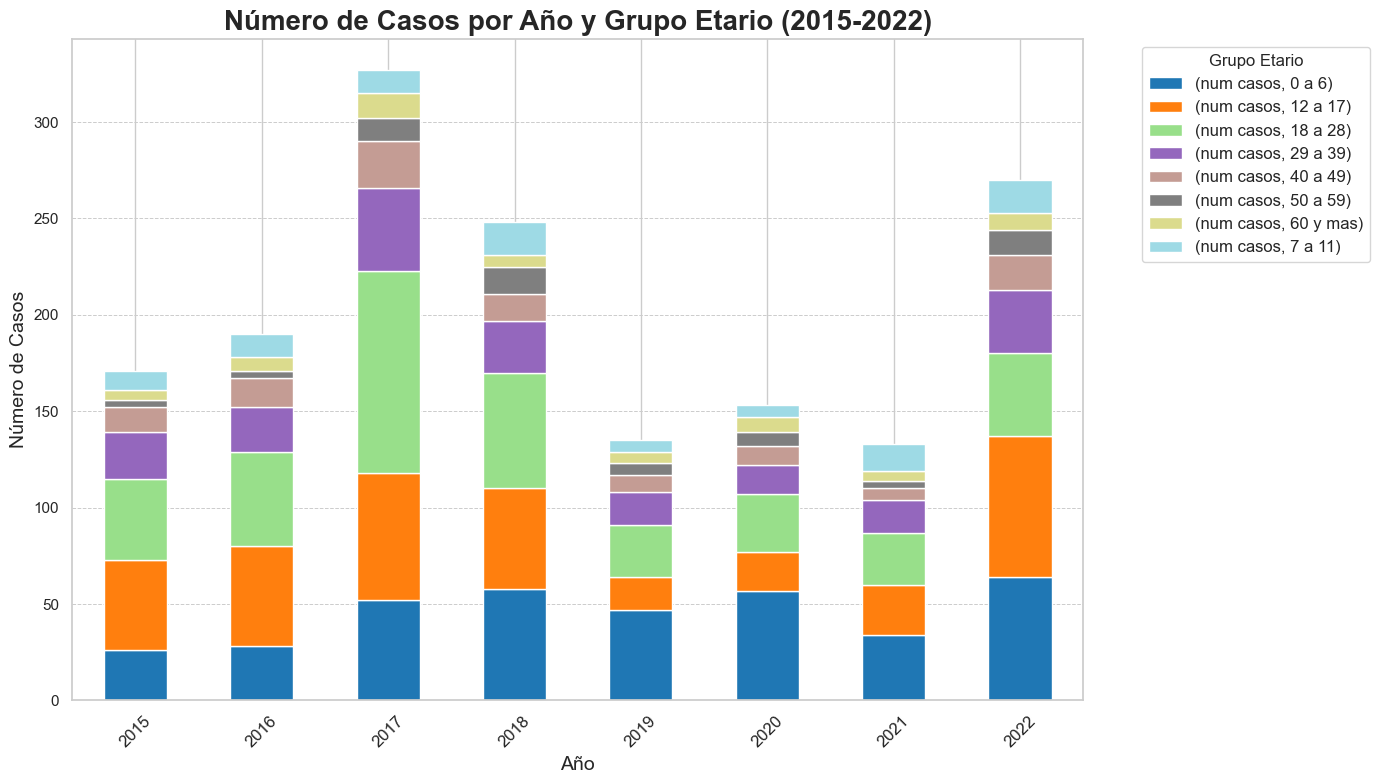

In [651]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir la columna de fecha a tipo datetime, si aún no se ha hecho
intoxicaciones_df_renombrado['fecha notificacion'] = pd.to_datetime(intoxicaciones_df_renombrado['fecha notificacion'], errors='coerce')

# Crear una columna de año a partir de la fecha
intoxicaciones_df_renombrado['año'] = intoxicaciones_df_renombrado['fecha notificacion'].dt.year

# Filtrar datos entre 2015 y 2022
data_filtrada = intoxicaciones_df_renombrado[(intoxicaciones_df_renombrado['año'] >= 2015) & (intoxicaciones_df_renombrado['año'] <= 2022)]

# Agrupar los datos por año y grupo etario, y contar el número de casos
casos_por_grupo_anual = data_filtrada.groupby(['año', 'grupo etario']).agg({'num casos': 'count'}).unstack().fillna(0)

# Crear el gráfico de barras apiladas
plt.figure(figsize=(14, 8))
casos_por_grupo_anual.plot(kind='bar', stacked=True, colormap='tab20', figsize=(14, 8))

# Personalización del gráfico
plt.title('Número de Casos por Año y Grupo Etario (2015-2022)', fontweight='bold', fontsize=20)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Número de Casos', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Grupo Etario', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Mostrar gráfico
plt.show()

CONCLUSIONES GENERALES

En general se observa:

Que la casuistica registrada en los Servicios de salud del departamento de Santander para las fechas de la data corresponde en mayor grado a jovenes de entre 18 y 28 años.

Que el conjunto de los niños con edades entre siete y once años y los adultos entre 29 y 49 y correspondientemente la tercera edad excluida del computudo por su bajo nivel de incidencia en el conjunto, son los menos propensos a sufrir intoxicaciones causadas por diversos agentes con potencial toxico.


Que los adolescentes entre 12 y 17 años del departamento de Santander han sido afectados por intoxicaciones de forma muy fluctuante con subidas y caidas en el tiempo y que en el año 2022 se presentó un crecimiento atípico en el número de casos de intoxicación de adolescentes de esta edad, teniendo en cuenta las fechas de los registros limite de datos.


Que el año 2017 resalta como el año de mayor incidencia en intoxicaciones de todo el conjunto de datos, siendo de interes público indagar la causa o causas de dicho crecimiento.

Que el año 2018 y supuso el recorte de casos del 2017 y que el año 2019 fue el de menor incidencia epidemiológica puesto que presentó recortes significativos hasta niveles de años anteriores lo que también plantea la necesidad de indagar sobre las posbiles causas.